In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from model_rf import model_wq
from plot_xai import calculate_shap, plot_avg_shap, plot_beeswarm_shap, plot_pdps, retrieve_top

In [2]:
import warnings
warnings.filterwarnings("ignore", message=".*The figure layout has changed to tight.*")

In [3]:
os.chdir("..")

cwd = os.getcwd()

In [4]:
input_folder = os.path.join(cwd, "input")

output_folder = os.path.join(cwd, "output")

figure_folder = os.path.join(cwd, "output", "figures")

In [5]:
# Set plot color
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plot_tone = cmap(1.0)

# 1. Import the predictors and prediction target

In [6]:
tn = pd.read_csv(f'{input_folder}\\tn.csv')

In [7]:
tp = pd.read_csv(f'{input_folder}\\tp.csv')

In [8]:
preds_tp = pd.read_csv(f'{input_folder}\\covariates_tp.csv')

In [9]:
preds_tn = pd.read_csv(f'{input_folder}\\covariates_tn.csv')

# 2. Explore the input variables

Next, a histogram is created to explore the distribution of the data.

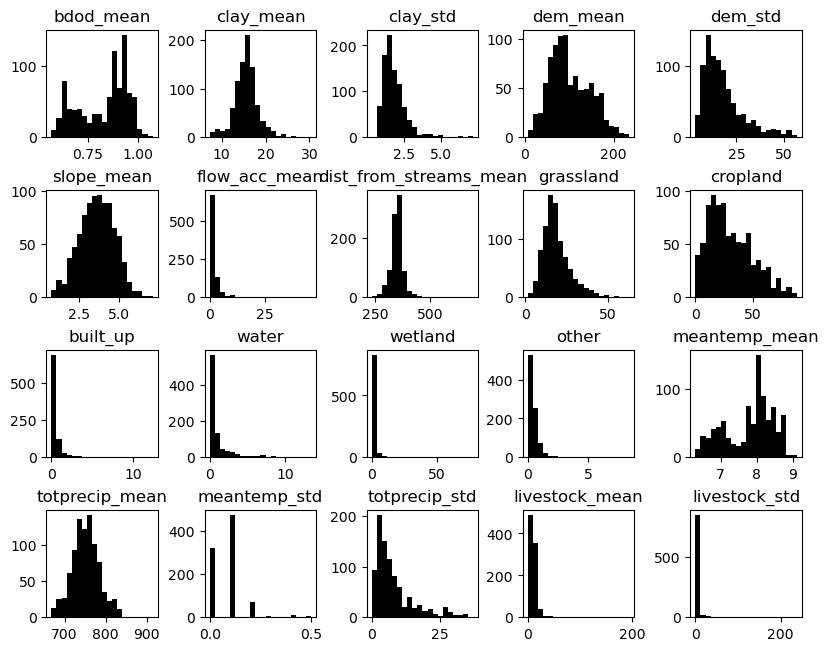

In [10]:
fig, ax = plt.subplots(4, 5, figsize=(8, 6.4), constrained_layout=True)

preds_tn.hist(bins=20, ax = ax, color='black', grid=False)

plt.savefig(f'{figure_folder}\\Figure_S1.pdf', dpi=500)

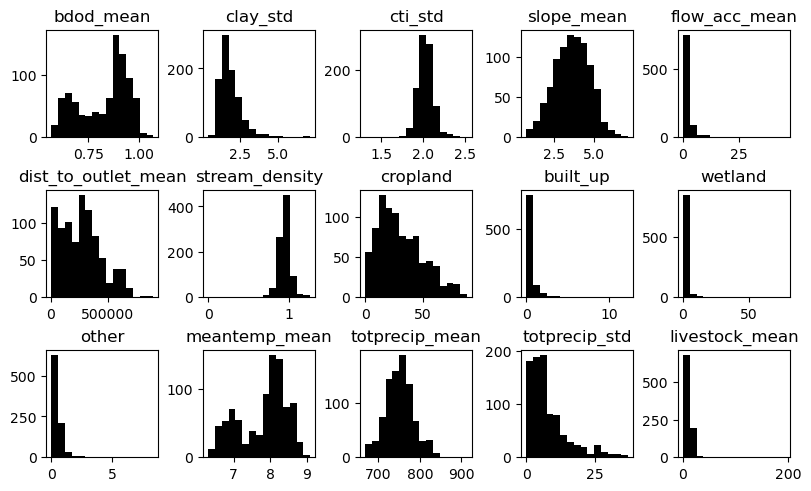

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(8, 4.8), constrained_layout=True)

preds_tp.hist(bins=15, ax = axes.flatten()[:17], color='black', grid = False)

plt.savefig(f'{figure_folder}\\Figure_S2.pdf', dpi=500)

In [12]:
tn = pd.merge(tn, preds_tn, on = 'site_id')

tn

,site_id,value,X,Y,bdod_mean,clay_mean,clay_std,dem_mean,dem_std,slope_mean,...,built_up,water,wetland,other,meantemp_mean,totprecip_mean,meantemp_std,totprecip_std,livestock_mean,livestock_std
0,ee_SJA0088000,1.39,6.460567e+06,536966.995615,0.65,16.15,4.94,39.36,18.11,3.83,...,0.11,0.42,6.58,0.5,7.2,789.0,0.1,13.0,3.13,1.60
1,ee_SJA0106000,5.28,6.499463e+06,611096.533002,0.64,14.51,1.15,61.33,6.78,3.14,...,0.19,0.16,0.16,0.1,6.8,713.0,0.1,3.0,17.81,1.49
2,ee_SJA0112000,1.27,6.443129e+06,585488.041664,0.65,13.10,1.51,92.82,15.55,3.90,...,0.13,0.31,0.18,0.4,6.8,759.0,0.0,3.0,7.02,1.45
3,ee_SJA0135000,4.47,6.565404e+06,582794.408882,0.63,14.98,1.75,90.99,15.26,3.12,...,0.18,0.10,5.11,0.7,6.5,760.0,0.1,8.0,15.08,7.87
4,ee_SJA0148000,1.90,6.472192e+06,529013.514162,0.64,16.08,4.46,56.89,23.92,3.82,...,0.34,0.30,4.89,0.8,6.9,766.0,0.2,20.0,8.21,6.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,lv_92,1.57,6.310550e+06,413147.668799,0.85,18.97,2.23,105.77,14.72,4.07,...,0.15,0.15,0.36,0.7,7.7,743.0,0.0,5.0,9.92,2.54
889,lv_94,1.70,6.319852e+06,416381.110931,0.85,18.50,2.25,101.65,15.74,3.95,...,0.16,0.18,0.35,0.6,7.7,742.0,0.0,6.0,9.61,2.44
890,lv_95,1.66,6.192672e+06,710175.286098,0.77,15.42,2.10,166.93,16.80,4.28,...,0.10,1.96,0.16,0.4,7.3,785.0,0.1,8.0,7.70,1.33
891,lv_97,1.09,6.380848e+06,372416.139786,0.88,13.42,2.23,44.28,21.51,4.64,...,0.22,2.59,2.15,0.5,8.2,736.0,0.1,27.0,5.02,1.45


In [13]:
tp = pd.merge(tp, preds_tp, on = 'site_id')


tp

,site_id,value,X,Y,bdod_mean,clay_std,cti_std,slope_mean,flow_acc_mean,dist_to_outlet_mean,stream_density,cropland,built_up,wetland,other,meantemp_mean,totprecip_mean,totprecip_std,livestock_mean
0,ee_SJA0088000,0.050,6.460567e+06,536966.995615,0.65,4.94,2.05,3.83,1.92,53493.42,1.01,6.81,0.11,6.58,0.5,7.2,789.0,13.0,3.13
1,ee_SJA0106000,0.021,6.499463e+06,611096.533002,0.64,1.15,1.88,3.14,0.34,326374.61,1.12,35.75,0.19,0.16,0.1,6.8,713.0,3.0,17.81
2,ee_SJA0112000,0.036,6.443129e+06,585488.041664,0.65,1.51,1.90,3.90,0.55,135077.07,0.87,28.81,0.13,0.18,0.4,6.8,759.0,3.0,7.02
3,ee_SJA0135000,0.028,6.565404e+06,582794.408882,0.63,1.75,2.07,3.12,2.19,83673.12,0.98,26.62,0.18,5.11,0.7,6.5,760.0,8.0,15.08
4,ee_SJA0148000,0.050,6.472192e+06,529013.514162,0.64,4.46,2.08,3.82,6.09,96747.86,1.00,17.40,0.34,4.89,0.8,6.9,766.0,20.0,8.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,lv_92,0.043,6.310550e+06,413147.668799,0.85,2.23,1.97,4.07,1.00,175808.53,0.96,26.67,0.15,0.36,0.7,7.7,743.0,5.0,9.92
889,lv_94,0.026,6.319852e+06,416381.110931,0.85,2.25,2.02,3.95,1.91,172141.96,0.97,29.71,0.16,0.35,0.6,7.7,742.0,6.0,9.61
890,lv_95,0.020,6.192672e+06,710175.286098,0.77,2.10,2.05,4.28,2.01,399178.50,0.94,29.45,0.10,0.16,0.4,7.3,785.0,8.0,7.70
891,lv_97,0.043,6.380848e+06,372416.139786,0.88,2.23,2.14,4.64,3.52,84543.81,0.97,7.12,0.22,2.15,0.5,8.2,736.0,27.0,5.02


# 3. TN baseline model

In [14]:
baseline_tn_model, baseline_tn_X_train = model_wq(tn, 'tn', 'baseline', output_folder)

RF model for tn
Splitting data for tn
Covariates used:  bdod_mean, clay_mean, clay_std, dem_mean, dem_std, slope_mean, flow_acc_mean, dist_from_streams_mean, grassland, cropland, built_up, water, wetland, other, meantemp_mean, totprecip_mean, meantemp_std, totprecip_std, livestock_mean, livestock_std
Tuning hyperparameters for tn
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.798 total time=   0.3s
[CV 2/5] END ......max_depth=5, n_estimators=50;, score=0.741 total time=   0.3s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.722 total time=   0.3s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.647 total time=   0.3s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.782 total time=   0.4s
[CV 1/5] END ......max_depth=5, n_estimators=60;, score=0.794 total time=   0.4s
[CV 2/5] END ......max_depth=5, n_estimators=60;, score=0.735 total time=   0.4s
[CV 3/5] END ......max_depth=5, n_estim

In [15]:
baseline_tn_shap_values = calculate_shap(baseline_tn_model, baseline_tn_X_train)

plot_avg_shap(baseline_tn_shap_values, baseline_tn_X_train, figure_folder, 'no output')

No figure created


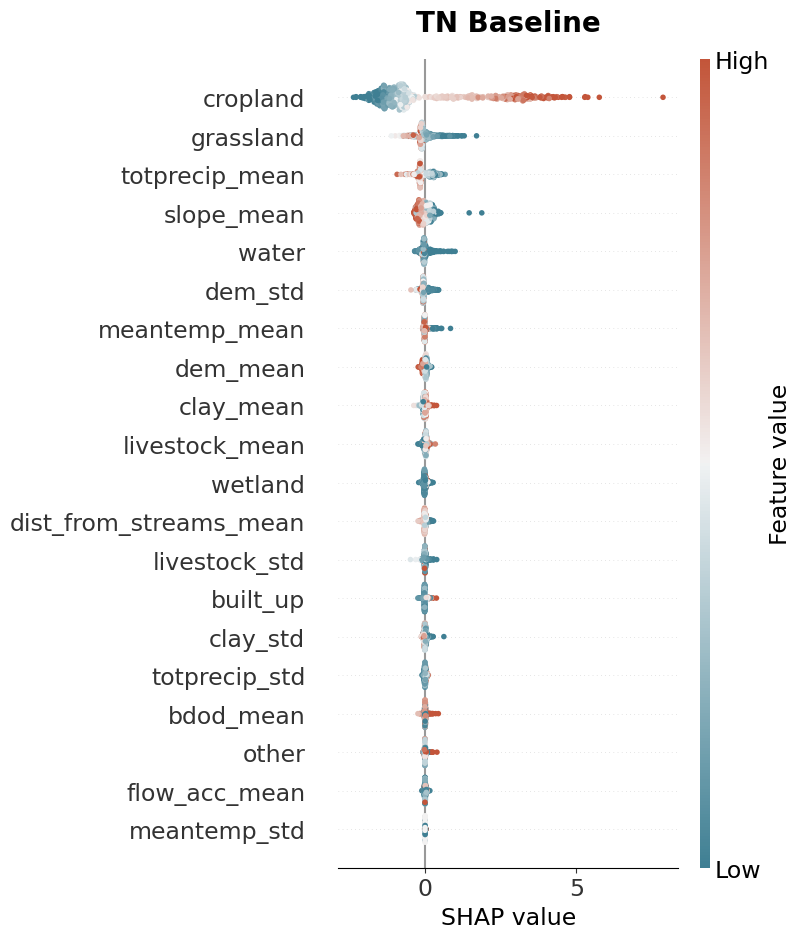

In [16]:
plot_beeswarm_shap(baseline_tn_shap_values, baseline_tn_X_train, figure_folder, 'tn', 'baseline', 'Figure_S5a')

In [17]:
plot_pdps(baseline_tn_model, baseline_tn_X_train, figure_folder, 'no output')

No figure created


# 4. TP baseline model

In [18]:
baseline_tp_model, baseline_tp_X_train = model_wq(tp, 'tp', 'baseline', output_folder)

RF model for tp
Splitting data for tp
Covariates used:  bdod_mean, clay_std, cti_std, slope_mean, flow_acc_mean, dist_to_outlet_mean, stream_density, cropland, built_up, wetland, other, meantemp_mean, totprecip_mean, totprecip_std, livestock_mean
Tuning hyperparameters for tp
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.227 total time=   0.5s
[CV 2/5] END ......max_depth=5, n_estimators=50;, score=0.199 total time=   0.5s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.220 total time=   0.5s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.135 total time=   0.5s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.076 total time=   0.5s
[CV 1/5] END ......max_depth=5, n_estimators=60;, score=0.214 total time=   0.7s
[CV 2/5] END ......max_depth=5, n_estimators=60;, score=0.164 total time=   0.7s
[CV 3/5] END ......max_depth=5, n_estimators=60;, score=0.235 total time=   0.7s
[CV 4/5] END 

In [19]:
baseline_tp_shap_values = calculate_shap(baseline_tp_model, baseline_tp_X_train)

plot_avg_shap(baseline_tp_shap_values, baseline_tp_X_train, figure_folder, 'no output')

No figure created


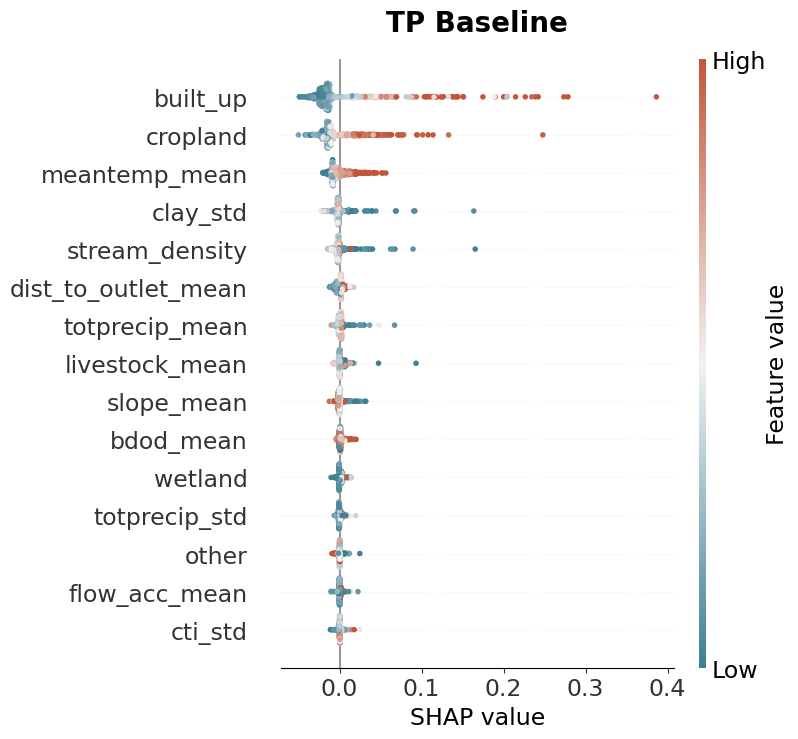

In [20]:
plot_beeswarm_shap(baseline_tp_shap_values, baseline_tp_X_train, figure_folder, 'tp', 'baseline', 'Figure_S5b')

In [21]:
plot_pdps(baseline_tp_model, baseline_tp_X_train, figure_folder, 'no output')

No figure created


# 5. TN Top 5 model

In [22]:
tn_top = retrieve_top(baseline_tn_X_train, baseline_tn_shap_values, 5, "tn", output_folder)

In [23]:
tn_top_covs = tn_top['feature'].values.tolist()

# add back site_id and coordinates
tn_top_covs.append('site_id')
tn_top_covs.append('value')
tn_top_covs.append('X')
tn_top_covs.append('Y')

# subset the columns for top covariates
top_tn_X_train = tn[tn_top_covs]
top_tn_X_train

,cropland,grassland,totprecip_mean,slope_mean,water,site_id,value,X,Y
0,6.81,11.58,789.0,3.83,0.42,ee_SJA0088000,1.39,6.460567e+06,536966.995615
1,35.75,17.33,713.0,3.14,0.16,ee_SJA0106000,5.28,6.499463e+06,611096.533002
2,28.81,20.50,759.0,3.90,0.31,ee_SJA0112000,1.27,6.443129e+06,585488.041664
3,26.62,10.99,760.0,3.12,0.10,ee_SJA0135000,4.47,6.565404e+06,582794.408882
4,17.40,13.94,766.0,3.82,0.30,ee_SJA0148000,1.90,6.472192e+06,529013.514162
...,...,...,...,...,...,...,...,...,...
888,26.67,20.79,743.0,4.07,0.15,lv_92,1.57,6.310550e+06,413147.668799
889,29.71,20.71,742.0,3.95,0.18,lv_94,1.70,6.319852e+06,416381.110931
890,29.45,18.03,785.0,4.28,1.96,lv_95,1.66,6.192672e+06,710175.286098
891,7.12,15.02,736.0,4.64,2.59,lv_97,1.09,6.380848e+06,372416.139786


In [24]:
top_tn_model, top_tn_X_train = model_wq(top_tn_X_train, 'tn', 'top5', output_folder)

RF model for tn
Splitting data for tn
Covariates used:  cropland, grassland, totprecip_mean, slope_mean, water
Tuning hyperparameters for tn
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.796 total time=   0.2s
[CV 2/5] END ......max_depth=5, n_estimators=50;, score=0.733 total time=   0.2s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.720 total time=   0.3s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.707 total time=   0.2s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.817 total time=   0.2s
[CV 1/5] END ......max_depth=5, n_estimators=60;, score=0.793 total time=   0.3s
[CV 2/5] END ......max_depth=5, n_estimators=60;, score=0.732 total time=   0.3s
[CV 3/5] END ......max_depth=5, n_estimators=60;, score=0.726 total time=   0.3s
[CV 4/5] END ......max_depth=5, n_estimators=60;, score=0.702 total time=   0.3s
[CV 5/5] END ......max_depth=5, n_estimators=60;, score=0.815 total 

In [25]:
top_tn_shap_values = calculate_shap(top_tn_model, top_tn_X_train)

plot_avg_shap(top_tn_shap_values, top_tn_X_train, figure_folder, 'no output')

No figure created


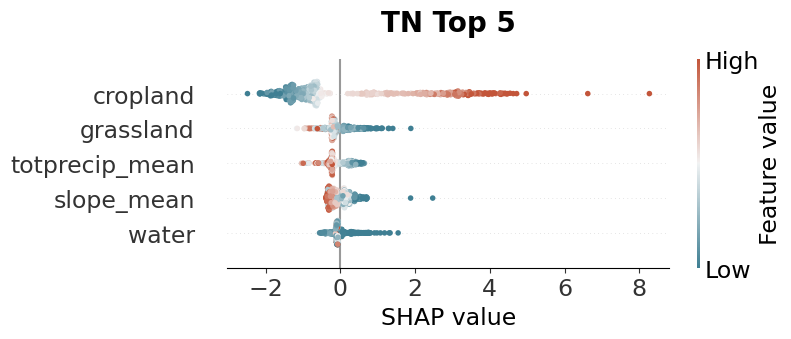

In [26]:
plot_beeswarm_shap(top_tn_shap_values, top_tn_X_train, figure_folder, 'tn', 'top5', 'Figure_6a')

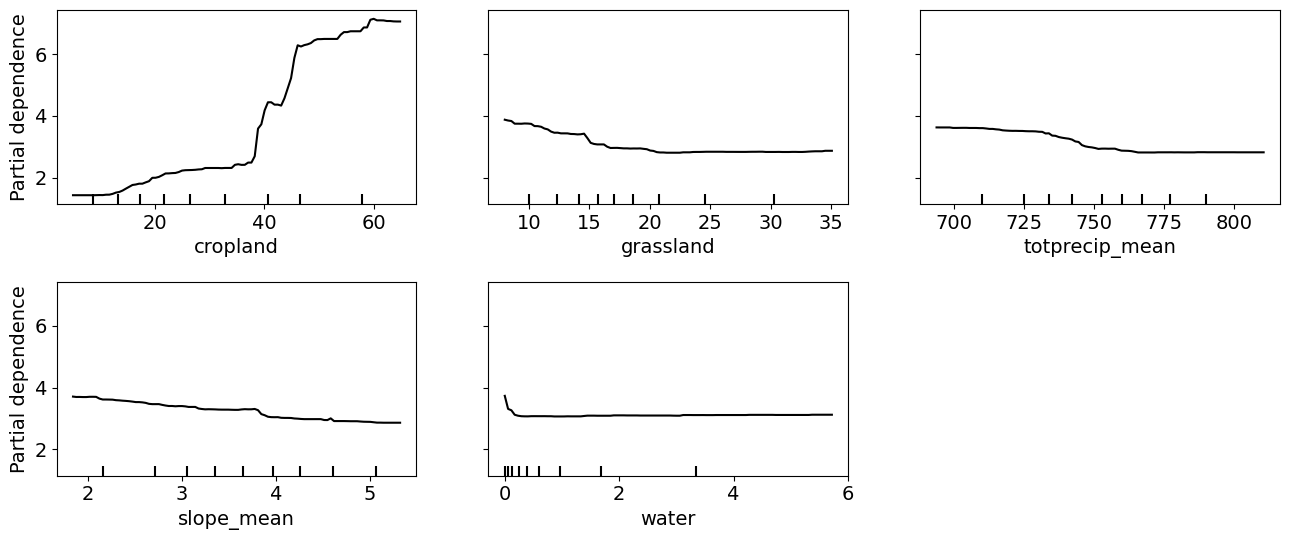

In [27]:
plot_pdps(top_tn_model, top_tn_X_train, figure_folder, 'Figure_S6a')

# 6. TP Top 5 model

In [28]:
tp_top = retrieve_top(baseline_tp_X_train, baseline_tp_shap_values, 5, "tp", output_folder)

In [29]:
tp_top_covs = tp_top['feature'].values.tolist()

# add back site_id and coordinates
tp_top_covs.append('site_id')
tp_top_covs.append('value')
tp_top_covs.append('X')
tp_top_covs.append('Y')

# subset the columns for top covariates
top_tp_X_train = tp[tp_top_covs]
top_tp_X_train

,built_up,cropland,meantemp_mean,clay_std,stream_density,site_id,value,X,Y
0,0.11,6.81,7.2,4.94,1.01,ee_SJA0088000,0.050,6.460567e+06,536966.995615
1,0.19,35.75,6.8,1.15,1.12,ee_SJA0106000,0.021,6.499463e+06,611096.533002
2,0.13,28.81,6.8,1.51,0.87,ee_SJA0112000,0.036,6.443129e+06,585488.041664
3,0.18,26.62,6.5,1.75,0.98,ee_SJA0135000,0.028,6.565404e+06,582794.408882
4,0.34,17.40,6.9,4.46,1.00,ee_SJA0148000,0.050,6.472192e+06,529013.514162
...,...,...,...,...,...,...,...,...,...
888,0.15,26.67,7.7,2.23,0.96,lv_92,0.043,6.310550e+06,413147.668799
889,0.16,29.71,7.7,2.25,0.97,lv_94,0.026,6.319852e+06,416381.110931
890,0.10,29.45,7.3,2.10,0.94,lv_95,0.020,6.192672e+06,710175.286098
891,0.22,7.12,8.2,2.23,0.97,lv_97,0.043,6.380848e+06,372416.139786


In [30]:
top_tp_model, top_tp_X_train = model_wq(top_tp_X_train, 'tp', 'top5', output_folder)

RF model for tp
Splitting data for tp
Covariates used:  built_up, cropland, meantemp_mean, clay_std, stream_density
Tuning hyperparameters for tp
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.083 total time=   0.2s
[CV 2/5] END ......max_depth=5, n_estimators=50;, score=0.259 total time=   0.2s
[CV 3/5] END ......max_depth=5, n_estimators=50;, score=0.094 total time=   0.2s
[CV 4/5] END ......max_depth=5, n_estimators=50;, score=0.156 total time=   0.2s
[CV 5/5] END ......max_depth=5, n_estimators=50;, score=0.008 total time=   0.2s
[CV 1/5] END ......max_depth=5, n_estimators=60;, score=0.080 total time=   0.2s
[CV 2/5] END ......max_depth=5, n_estimators=60;, score=0.232 total time=   0.2s
[CV 3/5] END ......max_depth=5, n_estimators=60;, score=0.132 total time=   0.2s
[CV 4/5] END ......max_depth=5, n_estimators=60;, score=0.163 total time=   0.2s
[CV 5/5] END .....max_depth=5, n_estimators=60;, score=-0.001 t

In [31]:
top_tp_shap_values = calculate_shap(top_tp_model, top_tp_X_train)

plot_avg_shap(top_tp_shap_values, top_tp_X_train, figure_folder, 'no output')

No figure created


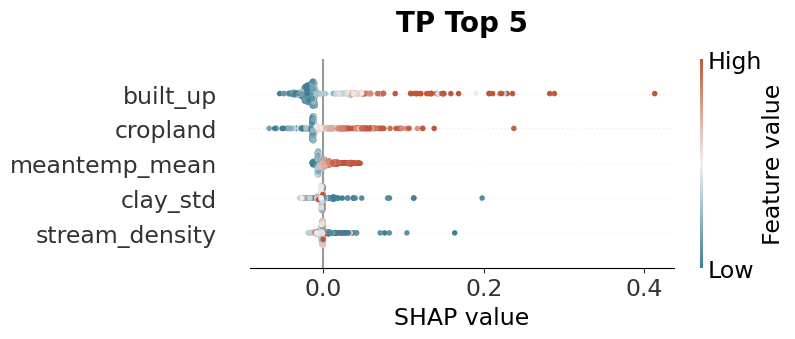

In [32]:
plot_beeswarm_shap(top_tp_shap_values, top_tp_X_train, figure_folder, 'tp', 'top5', 'Figure_6b')

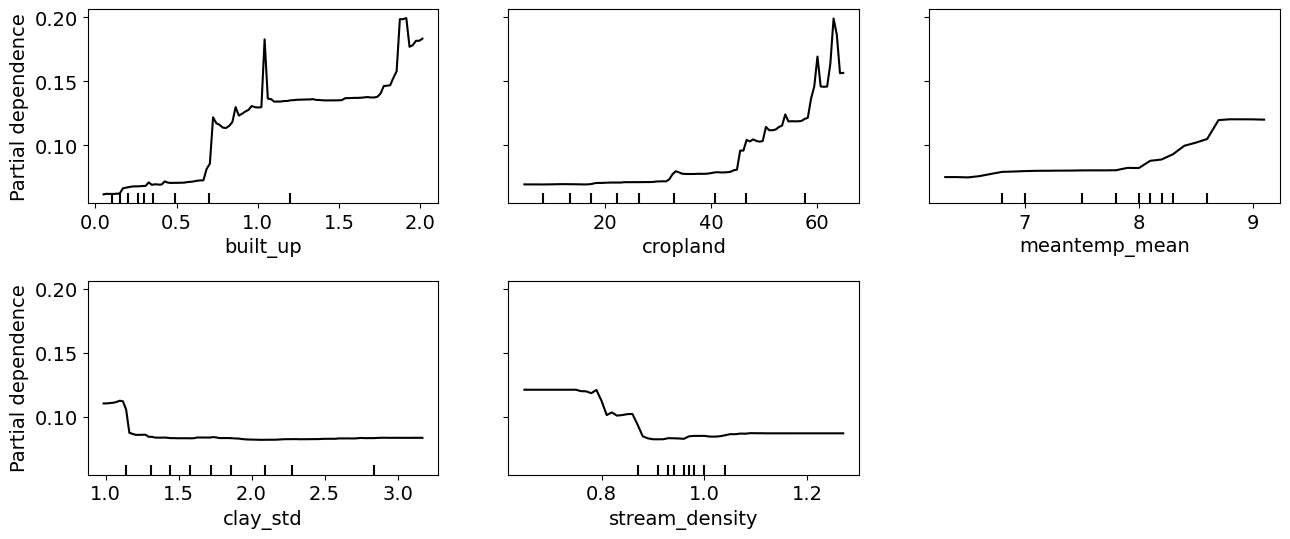

In [33]:
plot_pdps(top_tp_model, top_tp_X_train, figure_folder, 'Figure_S6b')